# Prve vezbe

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.ticker as ticker

In [10]:
print(os.getcwd())
print(os.listdir())

/Users/anamilinkovic/Documents/matf/kursevi/astrobiologija/zadaci
['nasa_exoplanet.csv', 'python_handbook.ipynb', 'zadatak1.ipynb', '.ipynb_checkpoints', 'PS_2025.12.05_12.14.02.csv']


U Python-u nacrtati histogram raspodele temperatura matičnih zvezda sa egzoplanetama.
 Zatim napraviti histogram broja egzoplaneta po tipu zvezde (M, K, G, F).

### Zadatak1

<div class="alert alert-block alert-info">
U Python-u nacrtati histogram raspodele temperatura matičnih zvezda sa egzoplanetama.
 Zatim napraviti histogram broja egzoplaneta po tipu zvezde (M, K, G, F)
</div>

In [30]:
nasa_exoplanet = pd.read_csv("nasa_exoplanet.csv",delimiter=',',skiprows=46,dtype ='str')

In [32]:
print(nasa_exoplanet.columns)

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2'],
      dtype='object')


In [60]:
pl_name_nasa = nasa_exoplanet['pl_name']
hostname_nasa = nasa_exoplanet['hostname']
stype_nasa = nasa_exoplanet['st_spectype']
st_mass_nasa = nasa_exoplanet['st_mass']
st_teff_nasa = nasa_exoplanet['st_teff']

In [93]:
print(stype_nasa)

81        M4.5 V
82        M4.5 V
85          G8 V
92       K0 IV-V
93          G8 V
          ...   
39149      B2 IV
39150     K0 III
39153     K2 III
39154     G9 III
39157     K0 III
Name: st_spectype, Length: 2876, dtype: object


In [158]:
def izbaci(df):
    df = df.replace("", np.nan)   # prazni stringovi -> NaN
    df = df.dropna()  # bez NaN redova
    return df

In [160]:
pl_name_nasa = izbaci(pl_name_nasa)
hostname_nasa = izbaci(hostname_nasa)
stype_nasa = izbaci(stype_nasa)
st_mass_nasa = izbaci(st_mass_nasa)
st_teff_nasa = izbaci(st_teff_nasa)

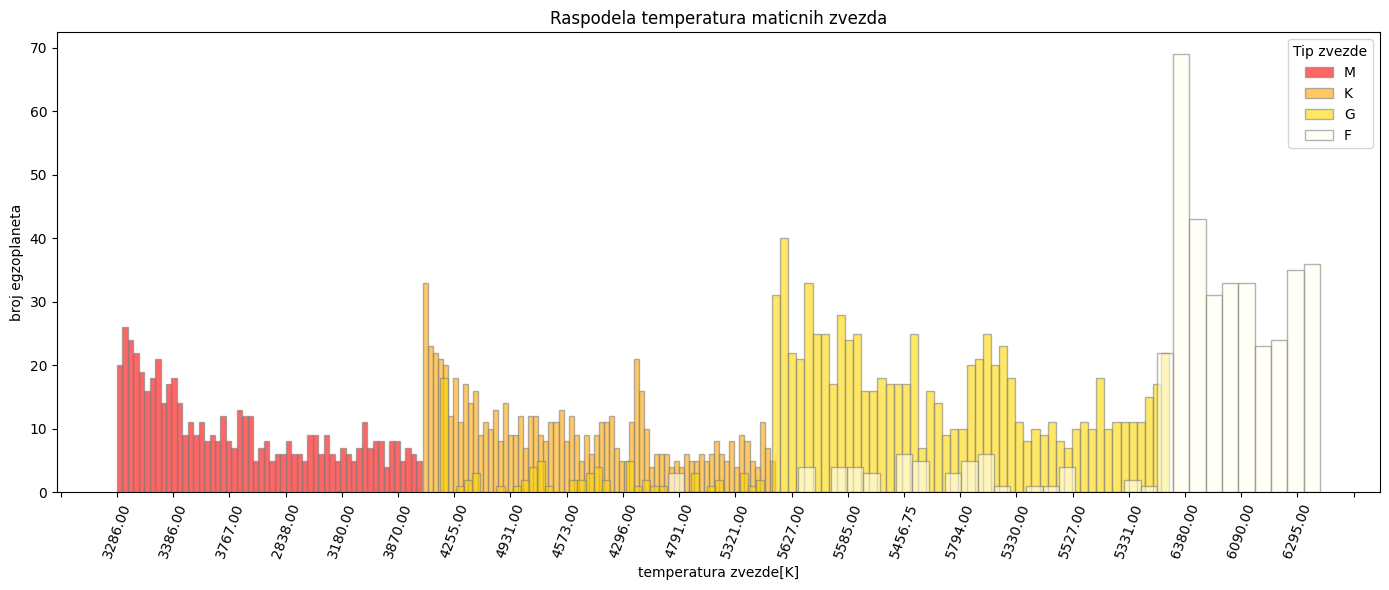

In [271]:
df = nasa_exoplanet[['st_teff', 'st_spectype']].dropna()

df['stype_first'] = df['st_spectype'].str[0] #prvi karakter

#jos jedan red "cist" od ostalih oznaka - samo prvi karakter za tip zvezda
df = df[df['stype_first'].isin(['M','K','G','F'])]

colors = {'M':'red', 'K':'orange', 'G':'gold', 'F':'ivory'}

plt.figure(figsize=(14,6))

suma = 0
for stype, color in colors.items():
    subset = df[df['stype_first'] == stype]['st_teff']
    plt.hist(subset, bins=(len(subset)//10), color=color, alpha=0.6, label=stype,edgecolor='grey')
    #suma += len(subset)//10
    #print(suma)
    #print(len(subset)//10)
plt.xlabel("temperatura zvezde[K]")
plt.ylabel("broj egzoplaneta")

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=25))
#plt.gca().invert_xaxis()
plt.xticks(rotation=70)
plt.title("Raspodela temperatura maticnih zvezda")
plt.legend(title="Tip zvezde")
plt.tight_layout()
#plt.grid(alpha = 0.4)
plt.show()

### Zadatak 3

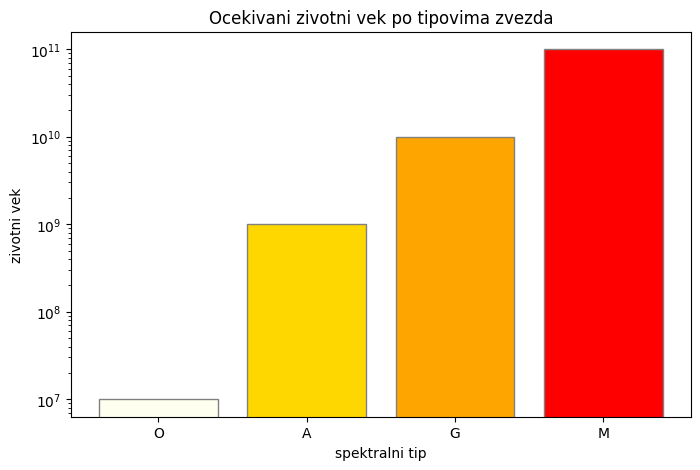

In [189]:
# Spektralni tipovi i životni vek
star_types = ['O', 'A', 'G', 'M']
lifetimes = [10e6, 1e9, 10e9, 100e9]  # [god]
colors = ['ivory', 'gold', 'orange', 'red']

plt.figure(figsize=(8,5))
plt.bar(star_types, lifetimes, color=colors, edgecolor='grey')
plt.yscale('log')
plt.ylabel("zivotni vek")
plt.xlabel("spektralni tip")
plt.title('Ocekivani zivotni vek po tipovima zvezda')
plt.show()

### Zadatak 4

![Alt text](nea_scatter.png)

### Zadatak 5

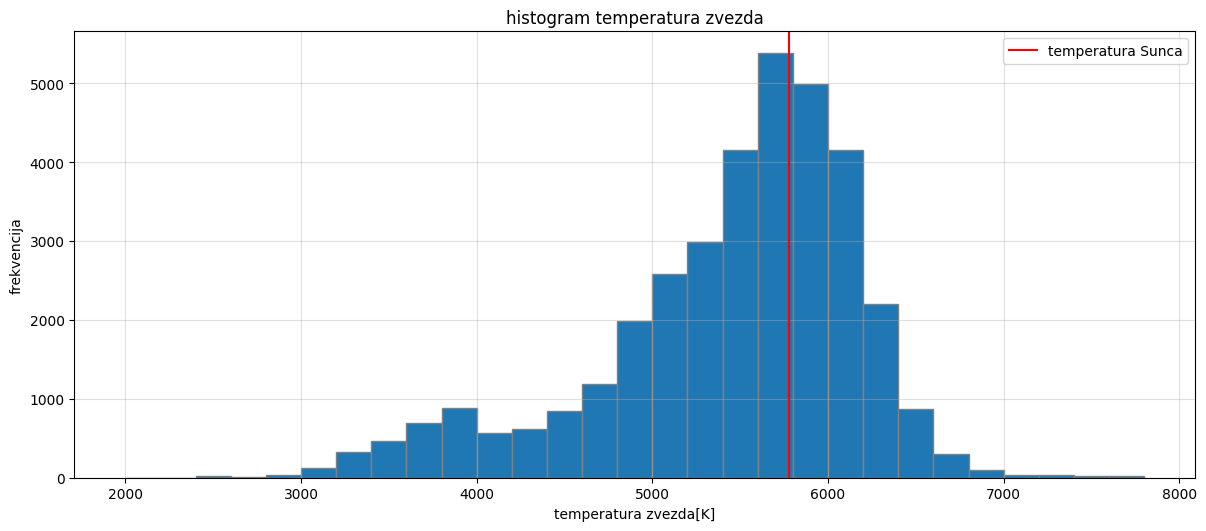

In [300]:
st_teff_nasa = nasa_exoplanet['st_teff']
temperature = pd.to_numeric(st_teff_nasa,errors='coerce')
temperature = temperature.dropna()

plt.figure(figsize=(12,5))
plt.hist(temperature,bins=np.arange(2000,8000,200),edgecolor='grey')
plt.axvline(x=5778, color = 'red',label = 'temperatura Sunca')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.title('histogram temperatura zvezda')
plt.legend()
plt.xlabel('temperatura zvezda[K]')
plt.ylabel('frekvencija')
plt.show()
